In [1]:
import symbolic_modern_robotics as smr
import sympy as s
s.init_printing()

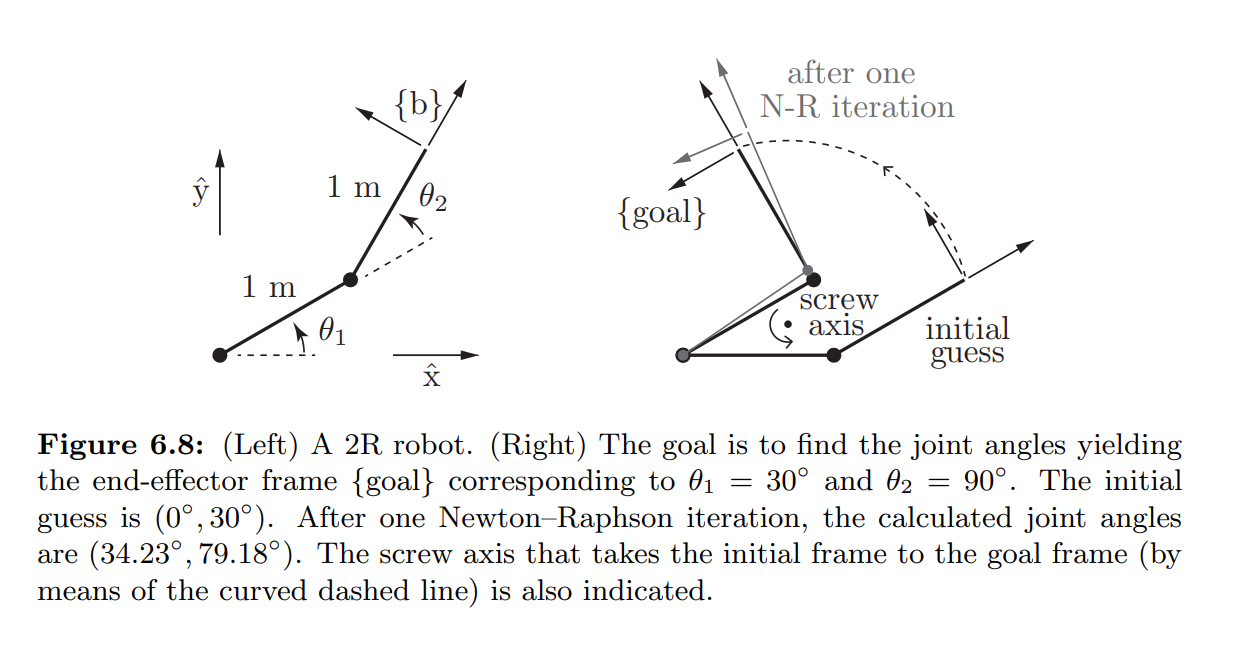

In [2]:
# Example 6.1
from IPython.display import Image
Image('exam_6.1_fig.PNG', width=500)

In [11]:
# 1-1. Find Forward Kinematics, Space PoE
l1,l2,g = s.symbols('l1,l2,g')
lxx,Iyy,Izz = s.symbols('lxx,Iyy,Izz')
m1,m2 = s.symbols('m1,m2')
theta_1,theta_2,thetadot_1,thetadot_2,thetaddot_1,thetaddot_2 = s.symbols('theta_1,theta_2,thetadot_1,thetadot_2,thetaddot_1,thetaddot_2', positive=True)


thetalist = s.Matrix([theta_1,theta_2])
dthetalist = s.Matrix([thetadot_1,thetadot_2])
ddthetalist = s.Matrix([thetaddot_1,thetaddot_2])

M = s.Matrix([[1, 0, 0, l1+l2],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])
Slist = s.Matrix([[0, 0, 1, 0, 0, 0],
                  [0, 0, 1, 0, -l1, 0]]).T

Blist = s.Matrix([[0, 0, 1, 0, l1+l2, 0],
                  [0, 0, 1, 0, l2, 0]]).T

M01 = smr.MatrixExp6(smr.VecTose3(Slist[:, 0]*thetalist[0]))
M12 = smr.MatrixExp6(smr.VecTose3(Slist[:, 1]*thetalist[1]))
Mlist = [M01, M12, M]

G01 = s.diag(0,0,0, m1, m1, m1)
G12 = s.diag(0,0,0, m2, m2, m2)
Glist = [G01, G12]

g_vec = s.Matrix([0, 0, -g])
Ftip = s.Matrix([0,0,0,0,0,0])

smr.InverseDynamics(thetalist, dthetalist, ddthetalist, g_vec, Ftip, Mlist, Glist, Slist)

⎡  2    ⎛                                                                     
⎢l₁ ⋅m₂⋅⎝4⋅θ̈₁⋅sin(θ₂)⋅sin(θ₁ + θ₂) - 4⋅θ̈₁⋅cos(θ₁) - 4⋅θ̈₁⋅cos(θ₂) + 4⋅θ̈₁⋅co
⎢                                                                             
⎣                                                                             

                                                                              
s(θ₁ + θ₂) + 4⋅θ̈₁ - θ̈₂⋅cos(θ₁) - 2⋅θ̈₂⋅cos(θ₂)⋅cos(θ₁ + θ₂) - 3⋅θ̈₂⋅cos(θ₂) 
                                                                              
                                                                              

                                                                              
+ 3⋅θ̈₂⋅cos(θ₁ + θ₂) + 3⋅θ̈₂ + 2⋅θ̇₁⋅θ̇₂⋅sin(θ₁) + 4⋅θ̇₁⋅θ̇₂⋅sin(θ₂)⋅cos(θ₁ + 
                                                                              
              0                                                               

                                   2             

In [4]:
M01, M12

⎛⎡cos(θ₁)  -sin(θ₁)  0  0⎤  ⎡cos(θ₂)  -sin(θ₂)  0  l₁⋅(1 - cos(θ₂))⎤⎞
⎜⎢                       ⎥  ⎢                                      ⎥⎟
⎜⎢sin(θ₁)  cos(θ₁)   0  0⎥  ⎢sin(θ₂)  cos(θ₂)   0    -l₁⋅sin(θ₂)   ⎥⎟
⎜⎢                       ⎥, ⎢                                      ⎥⎟
⎜⎢   0        0      1  0⎥  ⎢   0        0      1         0        ⎥⎟
⎜⎢                       ⎥  ⎢                                      ⎥⎟
⎝⎣   0        0      0  1⎦  ⎣   0        0      0         1        ⎦⎠

In [5]:
s.simplify(M01*M12*M)

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

In [6]:
Glist

⎡⎡0  0  0  0   0   0 ⎤  ⎡0  0  0  0   0   0 ⎤⎤
⎢⎢                   ⎥  ⎢                   ⎥⎥
⎢⎢0  0  0  0   0   0 ⎥  ⎢0  0  0  0   0   0 ⎥⎥
⎢⎢                   ⎥  ⎢                   ⎥⎥
⎢⎢0  0  0  0   0   0 ⎥  ⎢0  0  0  0   0   0 ⎥⎥
⎢⎢                   ⎥, ⎢                   ⎥⎥
⎢⎢0  0  0  m₁  0   0 ⎥  ⎢0  0  0  m₂  0   0 ⎥⎥
⎢⎢                   ⎥  ⎢                   ⎥⎥
⎢⎢0  0  0  0   m₁  0 ⎥  ⎢0  0  0  0   m₂  0 ⎥⎥
⎢⎢                   ⎥  ⎢                   ⎥⎥
⎣⎣0  0  0  0   0   m₁⎦  ⎣0  0  0  0   0   m₂⎦⎦

In [7]:
g_vec

⎡0 ⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣-g⎦

In [8]:
thetalist, dthetalist, ddthetalist

⎛⎡θ₁⎤  ⎡θ̇₁⎤  ⎡θ̈₁⎤⎞
⎜⎢  ⎥, ⎢  ⎥, ⎢  ⎥⎟
⎝⎣θ₂⎦  ⎣θ̇₂⎦  ⎣θ̈₂⎦⎠

In [9]:
[[None]]*6

[[None], [None], [None], [None], [None], [None]]

In [10]:
import modern_robotics as mr
import numpy as np
dir(mr)

['Adjoint',
 'AxisAng3',
 'AxisAng6',
 'CartesianTrajectory',
 'ComputedTorque',
 'CubicTimeScaling',
 'DistanceToSE3',
 'DistanceToSO3',
 'EndEffectorForces',
 'EulerStep',
 'FKinBody',
 'FKinSpace',
 'ForwardDynamics',
 'ForwardDynamicsTrajectory',
 'GravityForces',
 'IKinBody',
 'IKinSpace',
 'InverseDynamics',
 'InverseDynamicsTrajectory',
 'JacobianBody',
 'JacobianSpace',
 'JointTrajectory',
 'MassMatrix',
 'MatrixExp3',
 'MatrixExp6',
 'MatrixLog3',
 'MatrixLog6',
 'NearZero',
 'Normalize',
 'ProjectToSE3',
 'ProjectToSO3',
 'QuinticTimeScaling',
 'RotInv',
 'RpToTrans',
 'ScrewToAxis',
 'ScrewTrajectory',
 'SimulateControl',
 'TestIfSE3',
 'TestIfSO3',
 'TransInv',
 'TransToRp',
 'VecTose3',
 'VecToso3',
 'VelQuadraticForces',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'ad',
 'core',
 'np',
 'print_function',
 'se3ToVec',
 'so3ToVec']